# 1. Loading im.db as pd.df

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [3]:
movie_basics_imdb = pd.read_sql('''
SELECT *
FROM movie_basics
''', conn)

movie_akas_imdb = pd.read_sql('''
SELECT *
FROM movie_akas
''', conn)

movie_rat_imdb = pd.read_sql('''
SELECT *
FROM movie_ratings
''', conn)

principals_imdb = pd.read_sql('''
SELECT *
FROM principals
''', conn)

known_4_imdb = pd.read_sql('''
SELECT *
FROM known_for
''', conn)

directors_imdb = pd.read_sql('''
SELECT *
FROM directors
''', conn)

writers_imdb = pd.read_sql('''
SELECT *
FROM writers
''', conn)

persons_imdb = pd.read_sql('''
SELECT *
FROM persons
''', conn)

# 2. Name of df Variables:

### imdb Variables (each variable is an individual table):
- persons_imdb
- principals_imdb
- known_4_imdb
- directors_imdb
- writers_imdb
- movie_basics_imdb
- movie_rat_imdb
- movie_akas_imdb

# 3. Exploring IMDB df's:

### 3a. Exploring: movie_akas_imdb

In [5]:
#movie_akas_imdb.info()

In [29]:
#movie_akas_imdb['ordering'].value_counts().tail(20)

In [30]:
#movie_akas_imdb["movie_id"].value_counts()

#### ordering = 1 has the same length as indivitual movie_id's be the same length as unique movie_id

In [31]:
#movie_akas_imdb['region'].value_counts()

In [4]:
m_akas_us = pd.read_sql('''
SELECT *
FROM movie_akas
WHERE region = 'US' 
GROUP BY movie_id
''', conn)
m_akas_us.shape

(47433, 8)

In [33]:
#m_akas_us['movie_id'].value_counts()

In [17]:
len(m_akas_us['movie_id'].unique())

47433

In [34]:
#m_akas_us.loc[m_akas_us['movie_id'] == 'tt2488496']

### 3b. Exploring: movie_akas_imdb

In [35]:
#movie_basics_imdb.info()

In [36]:
#movie_basics_imdb['movie_id'].value_counts()

In [5]:
m_basics = pd.read_sql('''
SELECT *
FROM movie_basics
WHERE length(movie_id) = 9
''', conn)
#m_basics

In [6]:
akas_basics_merge = m_akas_us.merge(m_basics, on='movie_id',
                                        how='inner')
#akas_basics_merge.info()

### 3c. Explored: movie_rat_imdb

In [39]:
#movie_rat_imdb.info()

 # 3d. Combining IMDB database

In [7]:
imdb_merged = akas_basics_merge.merge(movie_rat_imdb, on='movie_id',
                                       how='left')
#imdb_merged

In [42]:
#imdb_merged.info()

In [8]:
imdb_merged.drop(['language', 'attributes', 'types'], axis=1, inplace=True)

In [44]:
#imdb_merged.info()

# 5. Loading tn.movie_budgets as pd.df

In [9]:
tn_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [10]:
#going to need this after I get movie id list onto budget list
"""
SELECT customerName, state, country
FROM 
WHERE country != 'USA' AND customerName LIKE '%collect%'
"""

"\nSELECT customerName, state, country\nFROM \nWHERE country != 'USA' AND customerName LIKE '%collect%'\n"

# 6. Exploring tn_budgets

In [11]:
tn_budgets.drop_duplicates(subset = ['movie'], inplace=True)

In [12]:
tn_budgets.rename(columns = {'movie':'primary_title'}, inplace=True)

In [13]:
tn_budgets['primary_title'].value_counts()

Hot Rod                              1
The Big Bounce                       1
Jem and the Holograms                1
Ant-Man and the Wasp                 1
Dragon Ball Super: Broly             1
                                    ..
Atlas Shrugged: Who Is John Galt?    1
Wah-Wah                              1
The Hunger Games: Catching Fire      1
Arachnophobia                        1
Green Room                           1
Name: primary_title, Length: 5698, dtype: int64

# 7: MERGE Merging Budgets to IMDB

#### follow link: https://www.geeksforgeeks.org/how-to-convert-pandas-dataframe-into-sql-in-python/

In [14]:
imdb_df_copy = imdb_merged.copy()

In [400]:
imdb_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47378 entries, 0 to 47377
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           47378 non-null  object 
 1   ordering           47378 non-null  int64  
 2   title              47378 non-null  object 
 3   region             47378 non-null  object 
 4   is_original_title  47373 non-null  float64
 5   primary_title      47378 non-null  object 
 6   original_title     47377 non-null  object 
 7   start_year         47378 non-null  int64  
 8   runtime_minutes    39642 non-null  float64
 9   genres             46788 non-null  object 
 10  averagerating      26637 non-null  float64
 11  numvotes           26637 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 4.7+ MB


In [513]:
#imdb_db = pd.merge_ordered(imdb_df_copy, tn_budgets, on='primary_title')
#imdb_db.drop_duplicates(subset='primary_title', inplace=True)

In [15]:
imdb_db = imdb_df_copy.merge(tn_budgets, how='inner', on='primary_title')

In [16]:
imdb_db

,movie_id,ordering,title,region,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,2,Foodfight!,US,0.0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0293429,5,Mortal Kombat: Devastation,US,0.0,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",NaN,NaN,10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,1,"A Bellman, a Hooker, and a Rabbi...",US,0.0,The Overnight,The Overnight,2010,88.0,None,7.5,24.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt3844362,6,The Overnight,US,0.0,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
4,tt0359950,25,The Secret Life of Walter Mitty,US,0.0,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,tt8575408,4,Hide and Seek,US,0.0,Hide and Seek,Amur senza fin,2018,91.0,Comedy,6.6,31.0,96,"Jan 28, 2005","$25,000,000","$51,100,486","$123,696,741"
2139,tt8632862,6,Fahrenheit 11/9,US,0.0,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018","$5,000,000","$6,352,306","$6,653,715"
2140,tt8663516,8,Child's Play,US,0.0,Child's Play,Child's Play,2019,120.0,Horror,NaN,NaN,77,"Nov 9, 1988","$9,000,000","$33,244,684","$44,196,684"
2141,tt9024106,3,Unplanned,US,0.0,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945.0,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


# Sorted by Genre

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# same as 
# from matplotlib import pyplot as plt

import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris

In [17]:
imdb_db['worldwide_gross'] = imdb_db['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
imdb_db['production_budget'] = imdb_db['production_budget'].str.replace('$','').str.replace(',','').astype(float)
imdb_db['domestic_gross'] = imdb_db['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

imdb_db['profit'] = imdb_db['worldwide_gross'] - imdb_db['production_budget']

In [409]:
imdb_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49168 entries, 0 to 51256
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           45289 non-null  object 
 1   ordering           45289 non-null  float64
 2   title              45289 non-null  object 
 3   region             45289 non-null  object 
 4   is_original_title  45284 non-null  float64
 5   primary_title      49168 non-null  object 
 6   original_title     45288 non-null  object 
 7   start_year         45289 non-null  float64
 8   runtime_minutes    37972 non-null  float64
 9   genres             44732 non-null  object 
 10  averagerating      25579 non-null  float64
 11  numvotes           25579 non-null  float64
 12  id                 5698 non-null   float64
 13  release_date       5698 non-null   object 
 14  production_budget  5698 non-null   float64
 15  domestic_gross     5698 non-null   float64
 16  worldwide_gross    569

In [18]:
imdb_db['genres'].dropna(inplace=True)

In [19]:
imdb_db['profit'].dropna(inplace=True)

In [20]:
genre_profit = imdb_db.loc[:,['genres','profit']]

In [21]:
genre_profit.dropna(axis = 0, inplace=True)

In [29]:
gen_pro = genre_profit.sort_values('profit', ascending=False).head(30)

In [33]:
#gen_pro

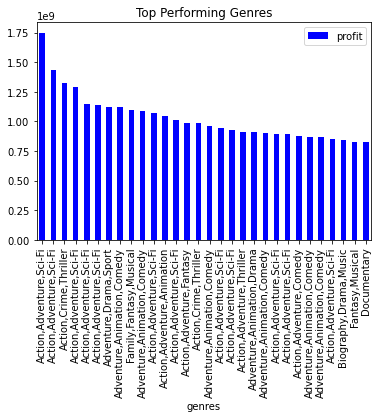

In [32]:
gen_pro.plot(kind = 'bar',
        x = 'genres',
        y = 'profit',
        color = 'blue')
  
# set the title
plt.title('Top Performing Genres')
  
# show the plot
plt.show()

#  Sorted by popularity

In [245]:
tmdb_votes = pd.read_csv('data/tmdb.movies.csv.gz')

In [246]:
tmdb_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [241]:
#tmdb_votes.rename(columns={'original_title':'primary_title'}, inplace=True)

In [247]:
tmdb_votes.drop_duplicates(subset='original_title', inplace=True)

In [256]:
tmdb_votes.drop_duplicates(subset='title', inplace=True)

In [ ]:
#not a big difference between taking out one 'title' column
#dupe over the other. Better safe than sorry?

In [257]:
imdb_votes = imdb_df_copy.merge(tmdb_votes, on='original_title')
imdb_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11970 entries, 0 to 11969
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           11970 non-null  object 
 1   ordering           11970 non-null  int64  
 2   title_x            11970 non-null  object 
 3   region             11970 non-null  object 
 4   is_original_title  11969 non-null  float64
 5   primary_title      11970 non-null  object 
 6   original_title     11970 non-null  object 
 7   start_year         11970 non-null  int64  
 8   runtime_minutes    11463 non-null  float64
 9   genres             11922 non-null  object 
 10  averagerating      11075 non-null  float64
 11  numvotes           11075 non-null  float64
 12  Unnamed: 0         11970 non-null  int64  
 13  genre_ids          11970 non-null  object 
 14  id                 11970 non-null  int64  
 15  original_language  11970 non-null  object 
 16  popularity         119

### Can we show that popularity == net profits?

In [266]:
tmdb_votes.head(20)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [261]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5698 non-null   int64 
 1   release_date       5698 non-null   object
 2   primary_title      5698 non-null   object
 3   production_budget  5698 non-null   object
 4   domestic_gross     5698 non-null   object
 5   worldwide_gross    5698 non-null   object
dtypes: int64(1), object(5)
memory usage: 311.6+ KB


In [267]:
tmdb_votes.rename(columns={'title': 'primary_title'}, inplace=True)

In [269]:
pop_prof = tn_budgets.merge(tmdb_votes, on='primary_title')

In [270]:
pop_prof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 1922
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               1923 non-null   int64  
 1   release_date_x     1923 non-null   object 
 2   primary_title      1923 non-null   object 
 3   production_budget  1923 non-null   object 
 4   domestic_gross     1923 non-null   object 
 5   worldwide_gross    1923 non-null   object 
 6   Unnamed: 0         1923 non-null   int64  
 7   genre_ids          1923 non-null   object 
 8   id_y               1923 non-null   int64  
 9   original_language  1923 non-null   object 
 10  original_title     1923 non-null   object 
 11  popularity         1923 non-null   float64
 12  release_date_y     1923 non-null   object 
 13  vote_average       1923 non-null   float64
 14  vote_count         1923 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 240.4+ KB


In [273]:
pop_prof['worldwide_gross'] = pop_prof['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
pop_prof['production_budget'] = pop_prof['production_budget'].str.replace('$','').str.replace(',','').astype(float)
pop_prof['domestic_gross'] = pop_prof['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

In [ ]:
pop_prof['profit'] = pop_prof['worldwide_gross'] - pop_prof['production_budget']

In [287]:
pop_prof['profit'].dropna(inplace=True)

In [288]:
pop_prof['popularity'].dropna(inplace=True)

In [291]:
import numpy as np

In [294]:
pop_prof['popularity'].describe()

count    1923.000000
mean       10.559513
std         8.013401
min         0.600000
25%         5.599000
50%         9.394000
75%        14.225500
max        80.773000
Name: popularity, dtype: float64

In [295]:
pop_prof['profit'].describe()

count    1.923000e+03
mean     8.166380e+07
std      1.842203e+08
min     -1.104502e+08
25%     -1.804854e+06
50%      1.360958e+07
75%      7.795270e+07
max      2.351345e+09
Name: profit, dtype: float64

In [300]:
pop_prof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 1922
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               1923 non-null   int64  
 1   release_date_x     1923 non-null   object 
 2   primary_title      1923 non-null   object 
 3   production_budget  1923 non-null   float64
 4   domestic_gross     1923 non-null   float64
 5   worldwide_gross    1923 non-null   float64
 6   Unnamed: 0         1923 non-null   int64  
 7   genre_ids          1923 non-null   object 
 8   id_y               1923 non-null   int64  
 9   original_language  1923 non-null   object 
 10  original_title     1923 non-null   object 
 11  popularity         1923 non-null   float64
 12  release_date_y     1923 non-null   object 
 13  vote_average       1923 non-null   float64
 14  vote_count         1923 non-null   int64  
 15  profit             1923 non-null   float64
dtypes: float64(6), int64(4),

In [299]:
pop_prof

,id_x,release_date_x,primary_title,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,6.350639e+08
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1.072414e+09
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1.748134e+09
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510,3.559452e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,49,"Sep 1, 2015",Exeter,25000.0,0.0,4.897920e+05,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,4.7,121,4.647920e+05
1919,51,"Apr 21, 2015",Ten,25000.0,0.0,0.000000e+00,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5,-2.500000e+04
1920,54,"Dec 31, 2014",Dry Spell,22000.0,0.0,0.000000e+00,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,6.0,1,-2.200000e+04
1921,56,"Jan 4, 2013",All Superheroes Must Die,20000.0,0.0,0.000000e+00,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,3.9,19,-2.000000e+04


In [284]:
import matplotlib
import matplotlib.pyplot as plt

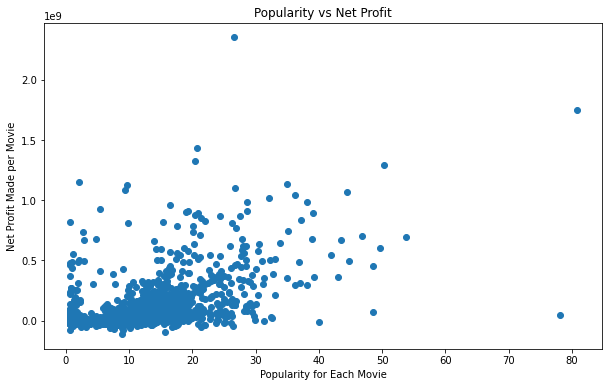

In [289]:
scatter_plot_title = 'Popularity vs Net Profit'
profit_title = 'Net Profit Made per Movie'
popularity_label = 'Popularity for Each Movie'

tackle_figure, ax = plt.subplots(figsize=(10, 6))

# Your code here
ax.scatter(x=pop_prof['popularity'], y=pop_prof['profit'])
ax.set_title(scatter_plot_title)
ax.set_xlabel(popularity_label)
ax.set_ylabel(profit_title);

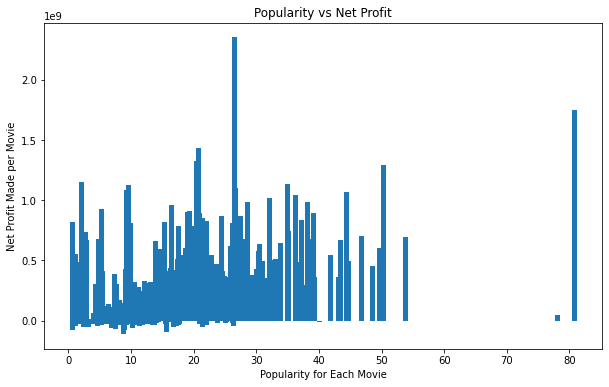

In [301]:
bar_chart_title = 'Popularity vs Net Profit'
profit_title = 'Net Profit Made per Movie'
popularity_label = 'Popularity for Each Movie'


profit_popularity, ax = plt.subplots(figsize=(10, 6))


x = pop_prof['popularity'].sort_index()
height = pop_prof['profit'].sort_index()

ax.bar(x, height)

plt.title(bar_chart_title)
ax.set_xlabel(popularity_label)
ax.set_ylabel(profit_title);

# EXTRA CREDIT STUFF (ORDERING BY CAST)

In [51]:
#movie_akas_imdb.loc[movie_akas_imdb['ordering'] == 1]

In [10]:
ordering_df = movie_akas_imdb.loc[movie_akas_imdb['ordering'] == 1]

In [52]:
#ordering_df.info()

In [53]:
#principals_imdb['category']

In [ ]:
principals_imdb = pd.read_sql(''' SELECT * FROM principals ''', conn) principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [ ]:
# Ordering = IMDB Top Cast order

I figured it out! It's the order that the 'top cast' shows up on the IMDB page. 

I'm going to stash this for after I make a visualization for Genre. 
Going to see if the 'top cast' 

search google for id = 'tt0323808'

https://www.imdb.com/title/tt0323808/fullcredits?ref_=tt_cl_sm
    
principals_imdb = pd.read_sql('''
SELECT *
FROM principals
''', conn)
principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [44]:
imdb_order =pd.read_sql('''
SELECT *, sum(ordering)
FROM principals
WHERE ordering <= 
GROUP BY movie_id
ORDER BY sum(ordering) desc
''', conn)
imdb_order

,movie_id,ordering,person_id,category,job,characters,sum(ordering)
0,tt9916754,10,nm9275317,cinematographer,None,None,55
1,tt9916706,10,nm1432957,actor,None,None,55
2,tt9916622,10,nm9272492,cinematographer,None,None,55
3,tt9916538,10,nm4700236,composer,music director,None,55
4,tt9914828,10,nm10537598,writer,english adaptation,None,55
...,...,...,...,...,...,...,...
143449,tt10007268,1,nm10541649,director,None,None,1
143450,tt10006874,1,nm10211155,director,None,None,1
143451,tt10003990,1,nm9033305,director,None,None,1
143452,tt0187902,1,nm0156955,actor,None,"[""Wong Fei Hung""]",1


In [54]:
#principals_imdb.loc[principals_imdb['ordering'] == 10]

In [55]:
#principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [56]:
#principals_imdb['movie_id'].value_counts()